Bu çalışmada kullanılan veri seti (income.data.csv), 500 kişiden oluşan hayali bir örnekleme aittir <br>
### Veri setinde üç nitelik yer almaktadır <br>
- Bunlardan ilki örneklerin numarasını temsil eden `ID` alanı (Unnamed: 0) 
- ikincisi 15 bin ile 75 bin dolar aralığında değişen `gelir` <br>
- sonuncusu ise 1 ile 10 arasında derecelendirilen mutluluk puanıdır `(mutluluk)`<br> <br>
* Gelir değerlerine bir çeşit normalizasyon uygulanmış, 10.000’e bölünerek  `gelir` verisinin `mutluluk` puanı ölçeğiyle eşleşmesi sağlanmıştır. Veri setinde 2$’lık bir değer 20.000$’ı, 3$’lık bir değer 30.000$’ı temsil etmektedir.<br>
* Bu çalışmanın amacı, gelir ile basit doğrusal regresyon modeli (istatistiksel olarak anlamlı doğrusal ilişki) kurarak mutluluk puanını tahmin etmektir.<br>
 `Gelir` niteliği bağımsız değişken/tahmini sağlayan nitelik olup, `mutluluk` ise bağımlı değişken yani `hedef niteliktir` .<br>
 Basit doğrusal regresyon modeli ile gelire göre mutluluk puanının değişimini ortaya koyan bir denklem elde edilecektir.

| Nitelik | Türkçe | Veri Tipi |
|---------|--------|------------|
| Unnamed: 0  | Örneklerin numarası| Ayrık |
|  income | Gelir| Sürekli |
| **happiness**| **Mutluluk**  | **Sürekli** | 


In [2]:
# Bu çalışmada NumPy, Pandas, Seaborn, Matplotlib ve Scikit-learn kütüphaneleri kullanılmıştır
# Regresyon modelinin elde edilebilmesi içinse ***statsmodels*** kütüphanesi yüklenmiştir
# Kütüphaneler yüklü değilse pip ile kurumlarını sağlayabilirsiniz. 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from matplotlib.cbook import boxplot_stats
import statsmodels.formula.api as smf
from sklearn.metrics import mean_absolute_error,mean_absolute_error


In [3]:
# Veri Okuma
veriSeti=pd.read_csv("income.data.csv")
veriSeti.head(6)

,Unnamed: 0,income,happiness
0,1,3.862647,2.314489
1,2,4.979381,3.433490
2,3,4.923957,4.599373
3,4,3.214372,2.791114
4,5,7.196409,5.596398
5,6,3.729643,2.458556


In [4]:
#Veri Ön-İşleme 
# Veri setindeki ilk sütun analizlerde kullanılmayacağı için veri setinden çıkarılmıştır.
veriSeti=veriSeti.iloc[:,1:3]

In [5]:
# Veri setindeki niteliklerin adları sırasıyla gelir ve mutluluk olacak şekilde değiştirilmiştir. Ardından veri setine ait özet bilgi görüntülenmiştir.
veriSeti=veriSeti.rename(columns={"income":"gelir","happiness":"mutluluk"})
veriSeti.describe()



,gelir,mutluluk
count,498.000000,498.000000
mean,4.466902,3.392859
std,1.737527,1.432813
min,1.506275,0.266044
25%,3.006256,2.265864
50%,4.423710,3.472536
75%,5.991913,4.502621
max,7.481521,6.863388


<Axes: xlabel='gelir', ylabel='mutluluk'>

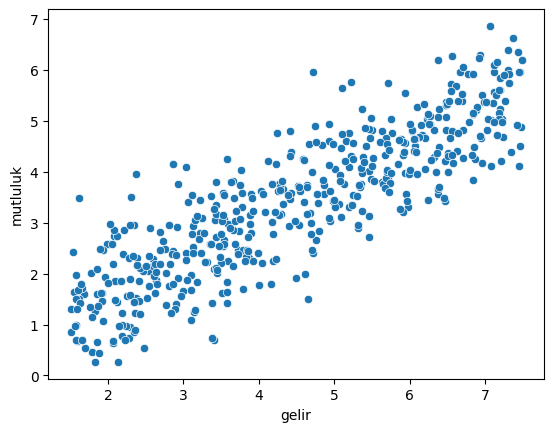

In [6]:
# gelir ve mutluluk nitelikleri, serpilme diyagramı üzerinde incelenirse aralarında pozitif doğrusal bir ilişkinin varlığı görülecektir
# Veri, köşegen boyunca dağılmıştır. Yani gelir arttıkça mutluluk puanı da artmakta, gelir azaldıkça ise mutluluk puanının da azalmakta olduğu söylenebilir.
sns.scatterplot(x="gelir",y="mutluluk",data=veriSeti)

C:\Users\gokha\AppData\Local\Temp\ipykernel_8508\809996300.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="gelir",data=veriSeti,palette="summer")


[{'mean': 4.466902362724138,
  'iqr': 2.98565727949608,
  'cilo': 4.213659166644111,
  'cihi': 4.63376134232919,
  'whishi': 7.48152138059959,
  'whislo': 1.50627504475415,
  'fliers': array([], dtype=float64),
  'q1': 3.0062558561330675,
  'med': 4.42371025448665,
  'q3': 5.991913135629147}]

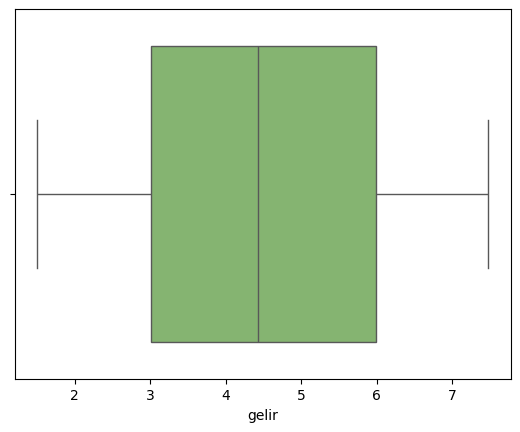

In [7]:
# Hedef nitelik kutu grafiği yardımı ile incelenmiştir. Nitelikte herhangi bir aykırı değer tespit edilememiştir. Kutu grafiğinden sonra gelen ekran görüntüsünde fliers bölümünde boş bir dizi yer aldığı görülebilir.
sns.boxplot(x="gelir",data=veriSeti,palette="summer")
boxplot_stats(veriSeti.gelir)


# Ortalama (mean): Veri setindeki tüm sayıların ortalamasıdır. Bu, veri setinin genel eğilimini temsil eder.

# IQR (iqr): Veri setinin %25'lik ve %75'lik dilim noktaları arasındaki farktır. Bu, veri setinin yayılımını gösterir.

# Cilo (cilo): Veri setinin %25'lik dilim noktasından 1.5 IQR uzaklıktaki değerdir.

# Cihi (cihi): Veri setinin %75'lik dilim noktasından 1.5 IQR uzaklıktaki değerdir.

# Whishi (whishi): Veri setinin en büyük değerinden 3 IQR uzaklıktaki değerdir.

# Whislo (whislo): Veri setinin en küçük değerinden 3 IQR uzaklıktaki değerdir.

# Flier'lar (fliers): Whislo veya whishi değerlerinin dışına düşen veri noktalarıdır. Bu noktalar, veri setindeki anormal değerleri veya hataları gösterebilir.

# Q1 (q1): Veri setinin %25'lik dilim noktasıdır.

# Medyan (med): Veri setinin sıralandığında tam ortasında yer alan değerdir.

# Q3 (q3): Veri setinin %75'lik dilim noktasıdır.

In [8]:
# Veri setinde eksik değer kontrolü yapılmış; ancak herhangi bir eksik değere rastlanmamıştır.

print(veriSeti.isnull().sum())

gelir       0
mutluluk    0
dtype: int64


In [9]:
# arasındaki korelasyon incelenmiştir
# Burada tek bir bağımsız değişken olduğundan, yalnızca bağımlı ve bağımsız değişken arasındaki korelasyon verilebilmiştir.
# Oysa korelasyon incelemesi, birden fazla bağımsız değişkenin olması durumunda birbiriyle ilişkisi yüksek olan niteliklerin tespit edilmesi ve buna göre bu niteliklerden birinin analizler öncesi veri setinden çıkarılması açısından önemlidir.
# Bunun için scipy kütüphanesinin stats modülünden pearsonr() fonksiyonu kullanılmıştır
# Pearson korelasyon katsayısı (statistic) ile iki nitelik arasındaki ilişkinin anlam düzeyini içeren   -değerini (pvalue)  hesaplamasıdır. 
# İki nitelik arasındaki ilişkinin anlamlı olabilmesi için   p-değerinin genellikle 0.05’ten küçük olması beklenir.
# Elde edilen sonuca göre gelir ve mutluluk arasındaki Pearson korelasyon katsayısı 0.87’dir.
# Hesaplanan   p-değeri bilimsel gösterim (scientific notation) biçiminde verilmiştir. Yani; 3.956245289952218e-151 değeri şeklinde ifade edilmektedir.
# Buna göre elde edilen p-değeri sıfıra oldukça yakın bir değerdir.
# Dolayısıyla gelir ile mutluluk puanı arasında pozitif yönde güçlü, anlamlı bir ilişkinin varlığından söz edilebilir

pearsonr(veriSeti.gelir,veriSeti.mutluluk)

PearsonRResult(statistic=0.8656337299838435, pvalue=3.956245289952218e-151)

In [10]:
# Son olarak eğitim ve test veri setleri oluşturulmuştur.  Verinin %70’i eğitim (egitim), %30’u ise test veri setinde olacak şekilde (frac = 0.7) rastgele ikiye ayrılmıştır.
egitim=veriSeti.sample(frac=0.7,replace=False,random_state=1)
ind=veriSeti.index.isin(egitim.index) # Boolean
test=veriSeti[~ind] 





In [11]:
# Modelleme
# Doğrusal regresyon modelinin (lr_model) oluşturulabilmesi için smf.ols() fonksiyonu kullanılmıştır.
# Bunun için fonksiyonun ilk argümanı olarak mutluluk ~ gelir biçiminde bağımlı değişkene karşı bağımsız değişken olacak biçimde modelin formül gösterimi yer almaktadır.
# Eğitim veri seti ile model kurulacağından, ikinci argüman olarak eğitim veri seti (egitim) verilmiştir.
#  .fit() ile model oluşturulmuştur.

# Modele ait .summary() metodu ile model özeti yazdırılmıştır 
# Bu özet bilgi regresyon denkleminin oluşturulması ve regresyon modeli iyiliğinin değerlendirilebilmesine ilişkin birçok önemli bilgiyi içermektedir.
lr_model=smf.ols(formula="mutluluk ~ gelir",data=egitim).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               mutluluk   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     1034.
Date:                Sat, 08 Jun 2024   Prob (F-statistic):          4.00e-106
Time:                        15:35:58   Log-Likelihood:                -378.71
No. Observations:                 349   AIC:                             761.4
Df Residuals:                     347   BIC:                             769.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2279      0.106      2.155      0.032       0.020       0.436
gelir          0.7083      0.022     32.160      0.000       0.665       0.752
==============================================================================
Omnibus:                        0.856   Durbin-Watson:                   2.129
Prob(Omnibus):                  0.652   Jarque-Bera (JB):                0.925
Skew:                           0.116   Prob(JB):                        0.630
Kurtosis:                       2.899   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
# regresyon modeli raporunda coef olarak verilenler model sabiti (Intercept) ve gelir değişkeni katsayısıdır (gelir)
# P > |t| alanında listelenen değerler ise modele giren niteliklere ait anlamlılık düzeylerini göstermektedir
# p değeri çok düşük olduğu için p <0.001, sıfır hipotezi reddedebilir ve gelirin mutluluk üzerinde istatistiksel olarak anlamlı bir etkisi olduğu sonucuna varılabilir.
# Burada gelir ile mutluluk arasında anlamlı pozitif bir ilişki vardır ve gelirdeki her bir birimlik artışa karşılık mutlulukta 0.7083 birimlik bir artış söz konusudur.
# Regresyon modelinin sabiti ve gelir niteliğine ait beta katsayılarına ayrıca ulaşmak için aşağıdaki kod satırı kullanılabilir.

lr_model.params


Intercept    0.227888
gelir        0.708258
dtype: float64

In [15]:
# Bu bilgilerden faydalanarak regresyon denklemi aşağıdaki gibi yazılabilir.

print("Regresyon Modeli")
print("mutluluk= %.3f+%.3f*gelir" % (lr_model.params["Intercept"],lr_model.params["gelir"]))

# elde edilen modelin veriye uyumu,R^2  ile değerlendirilebilmektedir.
# Hatırlanacak olursa, bu değerin 1’e yakın olması, modelin veriye iyi uyum sağladığını, 0’a yakın olması ise zayıf biçimde uyum sağladığını göstermektedir.
# Aşağıdaki kodlar yardımı ile regresyon modelini R^2 değeri yazdırılabilir. 
r_sq=lr_model.rsquared
print("Modelin R^2 değeri:%.2f" % r_sq)

Regresyon Modeli
mutluluk= 0.228+0.708*gelir
Modelin R^2 değeri:0.75


In [17]:
#  Elde edilen modelin veriye uyumu, Regresyon Modeli tarafından açıklanan toplam değişkenliğin oranı R^2  ile değerlendirilebilmektedir
r_sq=lr_model.rsquared
print("Modelin R^2 değeri= %.2f" % r_sq)

Modelin R^2 değeri= 0.75


In [24]:
# Performans Değerlendirme
lr_tahminler=lr_model.predict(test[["gelir"]])
lr_tahminler # y = Intercept-0.2279	+ gelir-0.7083*4.979381


1      3.754577
2      3.715322
3      2.504494
7      3.413708
10     3.509136
         ...   
468    2.442275
481    5.345191
484    2.239442
491    1.986056
492    2.660828
Length: 149, dtype: float64

In [28]:
result=0.2279+0.7083*4.979381
result

3.7547955623000004

In [31]:
print("LR Modeli Tahminleri:",lr_tahminler.head(5), sep="\n")
print("Gerçek Değerler:",test.mutluluk.head(5), sep="\n")

LR Modeli Tahminleri:
1     3.754577
2     3.715322
3     2.504494
7     3.413708
10    3.509136
dtype: float64
Gerçek Değerler:
1     3.433490
2     4.599373
3     2.791114
7     1.907137
10    3.175406
Name: mutluluk, dtype: float64


In [32]:
# Test veri setindeki tüm örnekler için model tahmin değerleri elde edildikten sonra gerçek değerler ve tahmin edilen değerler performansVerisi adlı bir DataFrame nesnesine atanmıştır

In [37]:
performansVerisi=pd.DataFrame(np.column_stack([test.mutluluk, lr_tahminler]))
performansVerisi.columns=["y_test","lr_tahminler"]
performansVerisi

,y_test,lr_tahminler
0,3.433490,3.754577
1,4.599373,3.715322
2,2.791114,2.504494
3,1.907137,3.413708
4,3.175406,3.509136
...,...,...
144,2.413382,2.442275
145,4.985255,5.345191
146,1.228773,2.239442
147,0.548365,1.986056


In [40]:
# Hata
performansVerisi["error"]=test.mutluluk - lr_tahminler
performansVerisi["error"]

0           NaN
1     -0.321087
2      0.884051
3      0.286619
4           NaN
         ...   
144   -0.920554
145         NaN
146         NaN
147         NaN
148   -0.032007
Name: error, Length: 149, dtype: float64

In [41]:
# ortalama hata (ME)
ME=np.sum((performansVerisi.error)/len(performansVerisi))

In [43]:
# ortalama mutlak hata (MAE)
MAE=np.sum(np.abs((performansVerisi.error)/len(performansVerisi)))

In [45]:
# ortalama yüzde hata (MPE)
MPE=100*(np.sum(performansVerisi.error/performansVerisi.y_test)/len(performansVerisi))


In [47]:
# ortalama mutlak yüzde hata (MAPE),
MAPE=100*(np.sum(np.abs(performansVerisi.error/performansVerisi.y_test))/len(performansVerisi))


In [48]:
# ortalama karesel hata (MSE)
MSE=np.sum(pow(performansVerisi.error,2))/len(performansVerisi)

In [50]:
# ortalama karesel hatanın karekökü (RMSE)
RMSE=np.sqrt(np.sum(pow(performansVerisi.error,2))/len(performansVerisi))

In [51]:
mae=mean_absolute_error(y_true=test.mutluluk,y_pred=lr_tahminler)

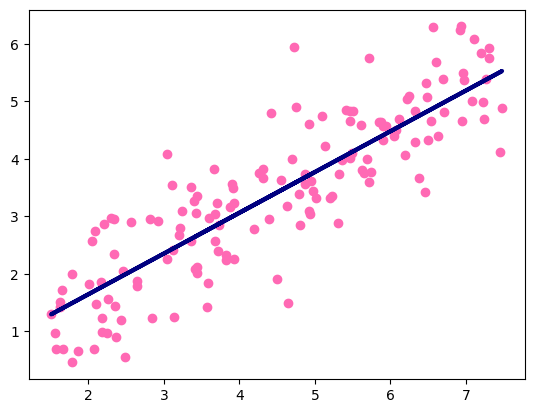

In [53]:
plt.scatter(test.gelir,test.mutluluk, color="hotpink")
plt.plot(test.gelir,lr_tahminler,color="navy",linewidth=3)